<a href="https://colab.research.google.com/github/nelaaulina/UAS_G.231.20.0164/blob/main/UASKasusA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import confusion_matrix

# Load irisAll.csv files as a Pandas DataFrame
# https://www.kaggle.com/arshid/iris-flower-dataset
data = pd.read_csv("Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# Some information about dataset
print (data.shape)
print(type(data)) # 'pandas.core.frame.DataFrame'
print(data.dtypes)

(150, 6)
<class 'pandas.core.frame.DataFrame'>
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Prepare input and output data
# for training models
y = data.pop('Species')
data.drop('Id', inplace=True, axis=1)
#  inplace=True means the operation would work on the original object.
#  axis=1 means we are dropping the column, not the row.
X=data

print(X.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


In [ ]:
print(y.head())

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.2)
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [ ]:
# ('identity', 'logistic', 'tanh', 'relu')
net = MLPClassifier(hidden_layer_sizes=(64,32),activation="relu",
                    random_state=1,alpha=1) # (256,128,64,32)

# Hidden layer activation functions {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
# Activation function for the all hidden layers is the same
# solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
# MLPClassifier uses the Average Cross-Entropy loss function. In the current version you can not set this parameter.
# MLPClassifier uses softmax transfer function as output activation function for Multiclass-Classification. In the current version you can not set this parameter.
net

MLPClassifier(alpha=1, hidden_layer_sizes=(64, 32), random_state=1)

In [ ]:
net.fit(X_trainscaled, y_train)
net

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1, hidden_layer_sizes=(64, 32), random_state=1)

In [ ]:
[coef.shape for coef in net.coefs_]

[(4, 64), (64, 32), (32, 3)]

In [ ]:
print(net.out_activation_)

softmax


In [ ]:
y_pred=net.predict(X_testscaled)
print(net.score(X_testscaled, y_test))

print('Test Accuracy : %.3f'%net.score(X_testscaled, y_test))
print('Training Accuracy : %.3f'%net.score(X_trainscaled, y_train))

0.9666666666666667
Test Accuracy : 0.967
Training Accuracy : 0.983


In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [ ]:
print(net.predict([[6,1,2,1]]))

['Iris-virginica']


In [ ]:
print(y_pred[:4])
print(y_test[:4].values)

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa']
['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa']


In [ ]:
print('Activation function for hidden layers : {}'.format(net.activation))
print('Solver : {}'.format(net.solver))
print('Alpha value : {}'.format(net.alpha))
# activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
# solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
print('Output activation by default: {}'.format(net.out_activation_))

Activation function for hidden layers : relu
Solver : adam
Alpha value : 1
Output activation by default: softmax


In [ ]:
print('Test Accuracy : %.3f'%net.score(X_testscaled, y_test)) ## Score method also evaluates accuracy for classification models.
print('Training Accuracy : %.3f'%net.score(X_trainscaled, y_train))

Test Accuracy : 0.967
Training Accuracy : 0.983


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as pyplot

In [ ]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [ ]:
#Keras requires your output feature to be one-hot encoded values.
import numpy as np
from tensorflow.keras.utils import to_categorical
### Categorical data to be converted to numeric data
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
y_number= label_encoder.fit_transform(y)

In [ ]:
y_number

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
Y = to_categorical(y_number)
print(Y[0:5])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=1, test_size=0.2)
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras import regularizers


model = Sequential()
model.add(Dense(10, input_dim=(4), activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_trainscaled, y_train, validation_data=(X_testscaled,y_test),
                    epochs=300, batch_size=7)

Epoch 1/300
18/18 [==============================] - 2s 34ms/step - loss: 1.0911 - accuracy: 0.4333 - val_loss: 1.1022 - val_accuracy: 0.2667
Epoch 2/300
18/18 [==============================] - 0s 15ms/step - loss: 1.0786 - accuracy: 0.5167 - val_loss: 1.0958 - val_accuracy: 0.3000
Epoch 3/300
18/18 [==============================] - 0s 14ms/step - loss: 1.0654 - accuracy: 0.4417 - val_loss: 1.0905 - val_accuracy: 0.3000
Epoch 4/300
18/18 [==============================] - 0s 12ms/step - loss: 1.0506 - accuracy: 0.4417 - val_loss: 1.0842 - val_accuracy: 0.3000
Epoch 5/300
18/18 [==============================] - 0s 18ms/step - loss: 1.0287 - accuracy: 0.4833 - val_loss: 1.0742 - val_accuracy: 0.4000
Epoch 6/300
18/18 [==============================] - 0s 20ms/step - loss: 1.0000 - accuracy: 0.6000 - val_loss: 1.0574 - val_accuracy: 0.4000
Epoch 7/300
18/18 [==============================] - 0s 7ms/step - loss: 0.9674 - accuracy: 0.6250 - val_loss: 1.0389 - val_accuracy: 0.4000
Epoch 8

In [ ]:
model.evaluate(X_testscaled,y_test)

1/1 [==============================] - 0s 39ms/step - loss: 0.0515 - accuracy: 0.9667


[0.05149887874722481, 0.9666666388511658]

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras import regularizers


model = Sequential()
model.add(Dense(10, input_dim=(4), activation='relu',
                    kernel_initializer='he_normal',
                    kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(7, activation='relu',
                    kernel_initializer='he_normal',
                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(5, activation='relu', kernel_initializer='he_normal',
                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_trainscaled, y_train, validation_data=(X_testscaled,y_test),
                    epochs=300, batch_size=7)

Epoch 1/300
18/18 [==============================] - 3s 28ms/step - loss: 1.4269 - accuracy: 0.2667 - val_loss: 1.4394 - val_accuracy: 0.3000
Epoch 2/300
18/18 [==============================] - 0s 4ms/step - loss: 1.3774 - accuracy: 0.5000 - val_loss: 1.4095 - val_accuracy: 0.3667
Epoch 3/300
18/18 [==============================] - 0s 4ms/step - loss: 1.3502 - accuracy: 0.3833 - val_loss: 1.3833 - val_accuracy: 0.2000
Epoch 4/300
18/18 [==============================] - 0s 5ms/step - loss: 1.3308 - accuracy: 0.5083 - val_loss: 1.3627 - val_accuracy: 0.4667
Epoch 5/300
18/18 [==============================] - 0s 4ms/step - loss: 1.3123 - accuracy: 0.5833 - val_loss: 1.3429 - val_accuracy: 0.4667
Epoch 6/300
18/18 [==============================] - 0s 4ms/step - loss: 1.2912 - accuracy: 0.6500 - val_loss: 1.3213 - val_accuracy: 0.5000
Epoch 7/300
18/18 [==============================] - 0s 5ms/step - loss: 1.2653 - accuracy: 0.6750 - val_loss: 1.2979 - val_accuracy: 0.5333
Epoch 8/300


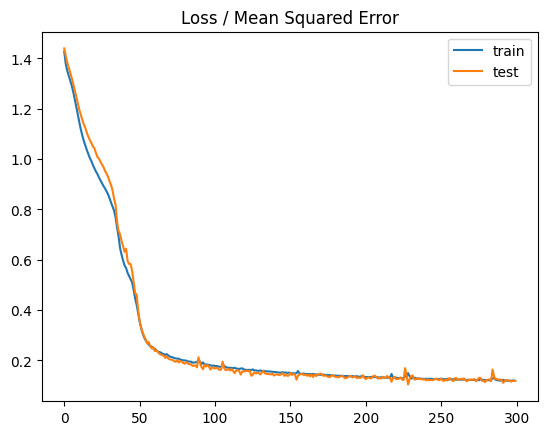

1/1 [==============================] - 0s 301ms/step
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
1/1 [==============================] - 0s 69ms/step - loss: 0.1186 - accuracy: 0.9667
Output activation by default: softmax


In [ ]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# Your input to confusion_matrix must be an array of int not one hot encodings.
y_pred = model.predict(X_testscaled)
cf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cf_matrix)

model.evaluate(X_testscaled,y_test)


print('Output activation by default: {}'.format(net.out_activation_))

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import confusion_matrix

# Load irisAll.csv files as a Pandas DataFrame
# https://www.kaggle.com/arshid/iris-flower-dataset
data = pd.read_csv("Iris.csv")

In [ ]:
categorical = data.dtypes[data.dtypes == "object"].index
print(categorical)

data[categorical].describe()

Index(['Species'], dtype='object')


,Species
count,150
unique,3
top,Iris-setosa
freq,50
